In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optimization

Suppose we want to optimize the function $f(x) = x^4 - 6*x^3 + 8*x^2 + 6*x - 9 $

Option 1: Using calculus ; solve $f'(x) = 0$ (but clumsy and hard to solve)

Option 2: Using gradient descent. There are many such numerical optimization methods, but we will cover only gradient descent for this course. 

## Gradient descent for one variable

In [3]:
def f(x):
    return x**4 - 6*x**3 + 8*x**2 + 6*x - 9

In [4]:
def my_func():
    x = np.linspace(-2, 5, 200)
    y = f(x)
    return x, y

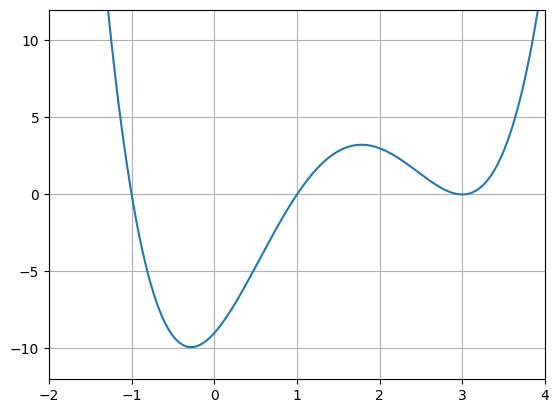

In [5]:
x, y = my_func()
plt.plot(x, y)
plt.xlim((-2, 4))
plt.ylim((-12, 12))
plt.xticks(np.arange(-2, 5))
plt.grid()
plt.show()

In [6]:
def gradient(a = 0):
    return 4*a**3 - 18*a**2 + 16*a + 6

In [7]:
def tangentLine(a = 0):
    x = np.linspace(-2, 5, 200)
    slope = gradient(a)
    y = f(a) + slope * (x-a)
    return x, y

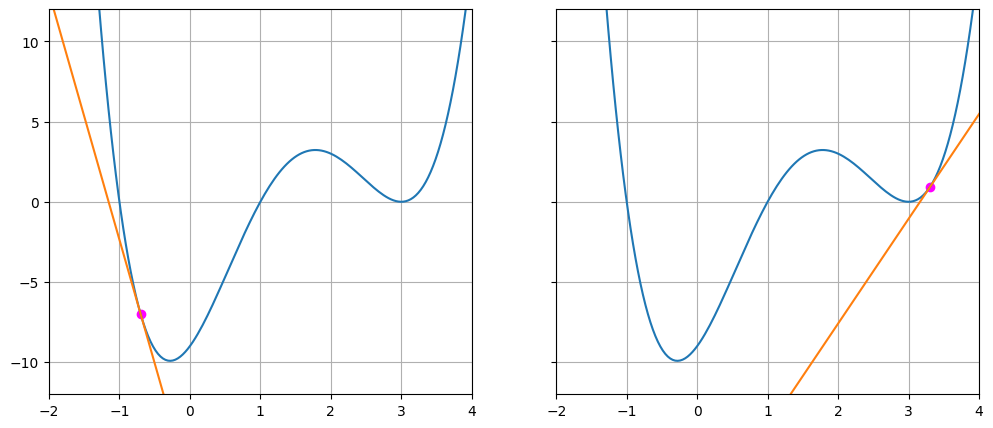

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
a = -0.7
x, y = my_func()
ax1.plot(x, y)
ax1.set_xlim((-2, 4))
ax1.set_ylim((-12, 12))
ax1.set_xticks(np.arange(-2, 5))
ax1.scatter(a, f(a), color='magenta')
x1, y1  = tangentLine(a)
ax1.plot(x1, y1)
ax1.grid()


a = 3.3
x, y = my_func()
ax2.plot(x, y)
ax2.set_xlim((-2, 4))
ax2.set_ylim((-12, 12))
ax2.set_xticks(np.arange(-2, 5))
ax2.scatter(a, f(a), color='magenta')
x1, y1  = tangentLine(a)
ax2.plot(x1, y1)
ax2.grid()

plt.show()

### Alternative 1: Finding the minima using random guess 

In [9]:
def find_minimum(left, right, step):
    xs = np.linspace(left, right, step)
    y = [f(x) for x in xs]
    return xs, y, xs[np.argmin(y)]

In [10]:
xs, ys, minima = find_minimum(-2, 4, 20)
minima

np.float64(-0.42105263157894735)

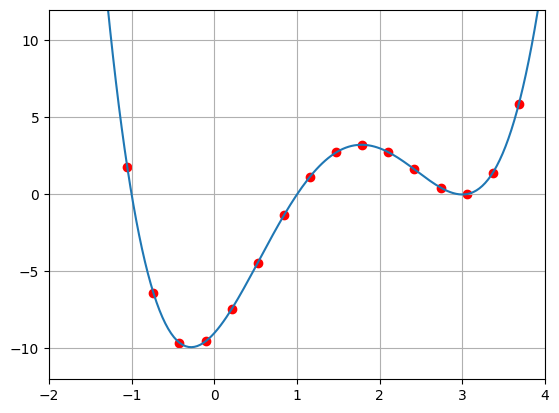

In [11]:


a = 3.3
x = np.linspace(-2, 5, 200)
plt.plot(x, f(x))
plt.xlim((-2, 4))
plt.ylim((-12, 12))
plt.xticks(np.arange(-2, 5))
plt.scatter(xs, ys, color='red')
plt.grid()

plt.show()


Cons: 
1. If the range is incorrect, then we cannot find the minima
2. Even if within the range, we need to have finer granularity for the points. 

## Better Approach: Gradient Descent

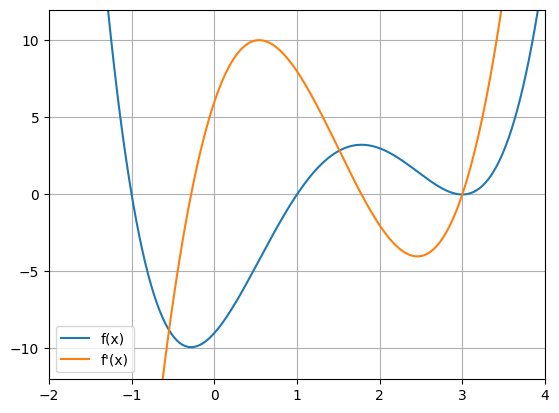

In [12]:
x = np.linspace(-2, 5, 200)
plt.plot(x, f(x), label="f(x)")
plt.plot(x, gradient(x), label="f'(x)")
plt.xlim((-2, 4))
plt.ylim((-12, 12))
plt.legend()
plt.xticks(np.arange(-2, 5))
plt.grid()

In [51]:
alpha = 0.09
old_point = -1
new_point = old_point - alpha * gradient(old_point)

print(old_point, new_point)

-1 1.88


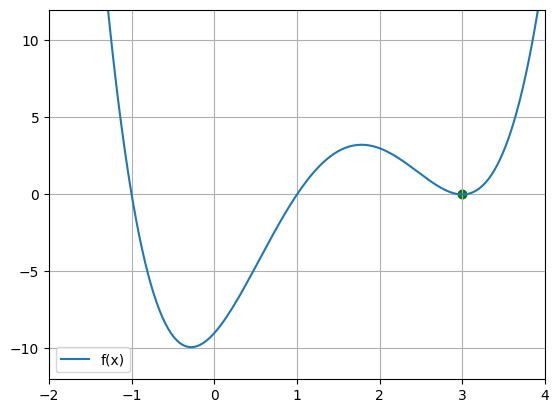

In [59]:
x = np.linspace(-2, 5, 200)
plt.plot(x, f(x), label="f(x)")
#plt.plot(x, gradient(x), label="f'(x)")
plt.scatter(old_point, f(old_point), color="magenta")
plt.scatter(new_point, f(new_point), color="green")
plt.xlim((-2, 4))
plt.ylim((-12, 12))
plt.legend()
plt.xticks(np.arange(-2, 5))
plt.grid()

old_point = new_point
new_point = old_point - alpha  * gradient(old_point)

## Optimizing loss function for Simple Linear Regression

In [60]:
import seaborn as sns

In [61]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


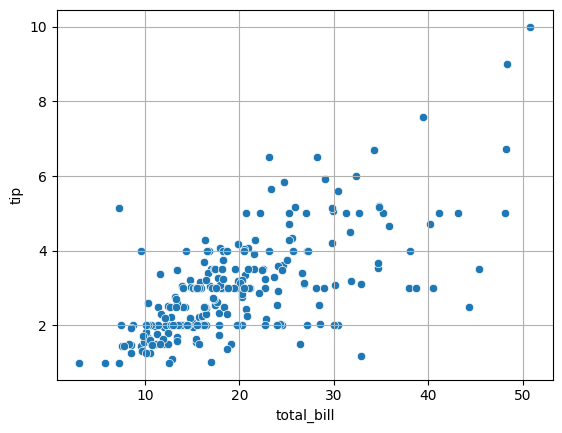

In [62]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.grid()

Consider the linear model : $y = \theta_1 * x$

In [63]:
def l2_loss(x, theta_1, y):
    y_hat = theta_1 * x
    return np.mean((y - y_hat) ** 2)

In [64]:
x = tips['total_bill']
theta_1 = 0.1
y = tips['tip']

l2_loss(x, theta_1, y)

np.float64(2.0777683729508194)

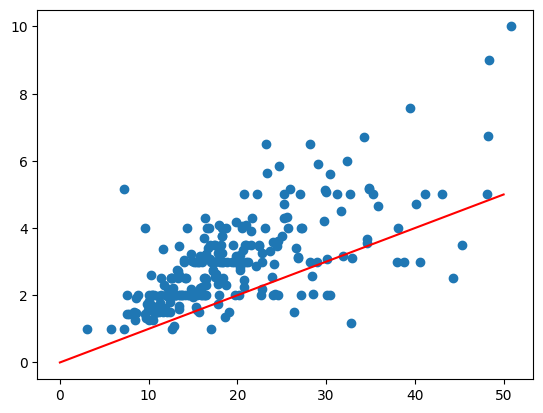

In [65]:
x = np.linspace(0, 50, 100)
y = theta_1 * x
plt.scatter(tips['total_bill'], tips['tip'])
plt.plot(x, y, color = 'red')

Text(0, 0.5, 'Loss function')

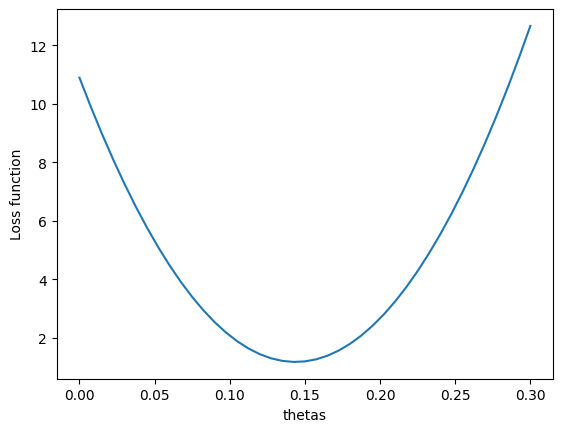

In [66]:
thetas = np.linspace(0, 0.3, 41)
y = np.array([l2_loss(tips['total_bill'], theta, tips['tip']) for theta in thetas])
plt.plot(thetas, y)
plt.xlabel('thetas')
plt.ylabel('Loss function')

# Alternative 1: Using calculus

In [22]:
theta_1 = np.sum(tips['tip'] * tips['total_bill']) / np.sum(tips['total_bill']**2)
theta_1

np.float64(0.14373189527721666)

## Alternative 2: Using Linear Algebra


In [23]:

X = np.array(tips[['total_bill']])
Y = np.array(tips[['tip']])

theta_1 = np.linalg.inv(X.T @ X) @ X.T @ Y
theta_1[0]

array([0.1437319])

## Alternative 3: Brute Force

In [24]:
thetas = np.linspace(0, 0.3, 41)
y = np.array([l2_loss(tips['total_bill'], theta, tips['tip']) for theta in thetas])
min(y), thetas[np.argmin(y)]

(np.float64(1.1788299961757172), np.float64(0.1425))

## Alternative 4: Gradient Descent

In [25]:
theta = 0.05
alpha = 0.0001

for _ in range(1000): # while(abs(new_theta - old_theta) close to 0.00001) then break the loop
    theta = theta - alpha * np.mean((theta * tips['total_bill'] - tips['tip']) * tips['total_bill'])

In [26]:
theta

np.float64(0.1437318952772164)

## Alternative 5: Using scipy.optimize

In [27]:
def my_loss(theta):
    return l2_loss(tips['total_bill'], theta, tips['tip'])

    
from scipy.optimize import minimize
res = minimize(my_loss, x0 = 0)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.178116115451325
        x: [ 1.437e-01]
      nit: 1
      jac: [ 3.204e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

## Alternative 6: Using scikit learn

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False).fit(tips[['total_bill']], tips[['tip']])
model.coef_

array([[0.1437319]])